# Naïve Bayes classifier

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df = pd.read_csv('data.csv', index_col=0)
print(df.shape)
df.head(2)

(863, 14)


,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0


In [3]:
from sklearn.model_selection import train_test_split
x_train, x_rem, y_train, y_rem = train_test_split(df.drop('result', axis=1) , df['result'], test_size=0.2 , random_state=1)
x_valid, x_test, y_valid, y_test = train_test_split(x_rem , y_rem , test_size=0.5)
# df.drop('result', axis=1)

Now we have:

- x_train and y_train ,, 80% of the data
- x_valid and y_valid ,, 10% of the data
- x_test and y_test ,, 10% of the data

## Training the Naive Bayes model on the Training set

In [4]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [5]:
y_pred = classifier.predict(x_valid)
from sklearn.metrics import confusion_matrix, accuracy_score , classification_report
cm = confusion_matrix(y_valid, y_pred)
print(cm)
accuracy_score(y_valid, y_pred)

[[53 25]
 [ 1  7]]


0.6976744186046512

In [6]:
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.68      0.80        78
           1       0.22      0.88      0.35         8

    accuracy                           0.70        86
   macro avg       0.60      0.78      0.58        86
weighted avg       0.91      0.70      0.76        86



# Predict on new data (test data)

In [7]:
pred=classifier.predict(x_test)

In [8]:
accuracy_score(y_test, pred)

0.7816091954022989

In [9]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[56 19]
 [ 0 12]]
              precision    recall  f1-score   support

           0       1.00      0.75      0.85        75
           1       0.39      1.00      0.56        12

    accuracy                           0.78        87
   macro avg       0.69      0.87      0.71        87
weighted avg       0.92      0.78      0.81        87



C:\Users\Adel\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


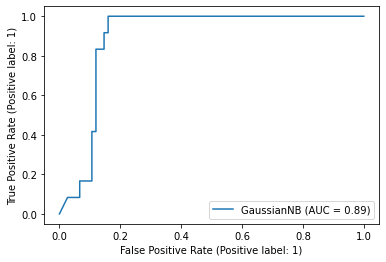

In [10]:
from sklearn import metrics
metrics.plot_roc_curve(classifier, x_test, y_test)
plt.show()

# Thank You